# Ciencia de Datos - UTN FRBA
## Titulo: Defensa del consumidor
#### Integrantes: 
- Mamani Mireya
- Chuquichambi Vanesa

#### Dataset utilizado
- Buenos Aires Data
https://datos.gob.ar/dataset/produccion-defensa-consumidor

<div style="border-bottom: 1px solid black; margin-top: 30px;"> </div>

## Objetivo
- En base al tipo de reclamo y demás condiciones dadas predecir si los próximos reclamos serán estimados y tenidos en cuenta.



<div style="border-bottom: 1px solid black; margin-top: 30px;"> </div>


# Configuracion inicial  
Colocar el path con el dataset proporcionado antes de ejecutar el codigo.

In [71]:
pwd

# Inicio

In [1]:
# importamos las librerías necesarias para trabajar en el siguiente bloque de código
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from IPython.display import Image 

In [2]:
reclamos=pd.read_csv("../reclamos-ingresados.csv", delimiter=';', index_col="id_reclamo")

In [133]:
reclamos

,fecha,razon_social,ingreso_por,derivado_a,categoria,rubro,subrubro,modalidad,motivo,especificacion_motivo,estado,motivo_rechazo,region_reclamante,id_provincia,provincia_reclamante,genero_reclamante,edad_reclamante
id_reclamo,,,,,,,,,,,,,,,,,
143587,1/3/2018,Soluciones Empresariales Arg.,Jurisdicción Jujuy,Jujuy,Servicios,Servicios financieros y seguros,Compañías financieras (mutuos),Presencial,Incumplimiento total de la prestación del serv...,-,-,NaN,Noroeste,38,Jujuy,-,NaN
143588,1/3/2018,Despegar.com.ar SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios turísticos,Paquetes turísticos,Presencial,Cumplimiento parcial o defectuoso de la presta...,Cancelación o supresión de viaje,-,NaN,Noroeste,38,Jujuy,-,NaN
143589,1/3/2018,Perez Roberto Jesus,Jurisdicción Jujuy,Jujuy,Productos,Construcción y equipamiento del hogar,Herramientas,Presencial,Entrega defectuosa,Producto no funciona,-,NaN,Noroeste,38,Jujuy,-,NaN
143590,1/3/2018,Horacio Pussetto SA,Jurisdicción Jujuy,Jujuy,Productos,"Rodados, automotores y embarcaciones",Automóviles,Presencial,"Incumplimiento de oferta, promociones y/o boni...",-,-,NaN,Noroeste,38,Jujuy,-,NaN
143591,1/3/2018,Directv Argentina SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios de comunicaciones,Televisión por cable/satelital,Presencial,Falta de procesamiento de baja del servicio,-,-,NaN,Noroeste,38,Jujuy,-,NaN
143592,1/3/2018,Telefonica moviles argentina SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios de comunicaciones,Telefonía celular,Presencial,Falta de procesamiento de baja del servicio,-,-,NaN,Noroeste,38,Jujuy,-,NaN
143593,1/3/2018,Garbarino SA,Jurisdicción Jujuy,Jujuy,Productos,Electrodomésticos y artefactos para el hogar,"Electrodomésticos de lavado (lavarropas, secar...",Presencial,Entrega defectuosa,Producto no funciona,-,NaN,Noroeste,38,Jujuy,-,NaN
143594,1/3/2018,Telecom Personal SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios de comunicaciones,Telefonía celular,Presencial,Facturación excesiva/ facturación cargos no co...,-,-,NaN,Noroeste,38,Jujuy,-,NaN
143595,1/3/2018,Directv Argentina SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios de comunicaciones,Televisión por cable/satelital,Presencial,Falta de procesamiento de baja del servicio,-,-,NaN,Noroeste,38,Jujuy,-,NaN


## Verificamos que no haya filas con valores null


In [22]:
reclamos.isnull().any()

fecha                    False
razon_social             False
ingreso_por              False
derivado_a               False
categoria                False
rubro                    False
subrubro                 False
modalidad                False
motivo                   False
especificacion_motivo    False
estado                   False
motivo_rechazo            True
region_reclamante        False
id_provincia             False
provincia_reclamante     False
genero_reclamante        False
edad_reclamante           True
dtype: bool

## Verificamos que no haya filas con valores nan

In [23]:
reclamos.isna().any()

fecha                    False
razon_social             False
ingreso_por              False
derivado_a               False
categoria                False
rubro                    False
subrubro                 False
modalidad                False
motivo                   False
especificacion_motivo    False
estado                   False
motivo_rechazo            True
region_reclamante        False
id_provincia             False
provincia_reclamante     False
genero_reclamante        False
edad_reclamante           True
dtype: bool

In [21]:
np.shape(reclamos)

(182676, 17)

# Evaluamos que columnas (features) tienen mas datos nulos

In [72]:

# Utilizamos varias funciones de pandas: isnull, sum, sort_values, count, concat y head
total = reclamos.isnull().sum().sort_values(ascending=False)
percent = (reclamos.isnull().sum()/reclamos.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(17)

,Total,Percent
motivo_rechazo,173815,0.951493
edad_reclamante,25397,0.139028
modalidad,0,0.000000
razon_social,0,0.000000
ingreso_por,0,0.000000
derivado_a,0,0.000000
categoria,0,0.000000
rubro,0,0.000000
subrubro,0,0.000000
motivo,0,0.000000


In [3]:
np.shape(reclamos)

(182676, 17)

Decidimos no eliminar los valores nulos para no perder datos importantes que hacen al analisis de los datos.

In [4]:
reclamo=reclamos.replace(np.nan,0)

In [5]:
np.shape(reclamo)

(182676, 17)

In [9]:
total = reclamo.isnull().sum().sort_values(ascending=False)
percent = (reclamo.isnull().sum()/reclamo.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(17)

,Total,Percent
edad_reclamante,0,0.0
modalidad,0,0.0
razon_social,0,0.0
ingreso_por,0,0.0
derivado_a,0,0.0
categoria,0,0.0
rubro,0,0.0
subrubro,0,0.0
motivo,0,0.0
genero_reclamante,0,0.0


In [10]:
reclamo.isnull().any()

fecha                    False
razon_social             False
ingreso_por              False
derivado_a               False
categoria                False
rubro                    False
subrubro                 False
modalidad                False
motivo                   False
especificacion_motivo    False
estado                   False
motivo_rechazo           False
region_reclamante        False
id_provincia             False
provincia_reclamante     False
genero_reclamante        False
edad_reclamante          False
dtype: bool

In [203]:
reclamo.head(5)

,fecha,razon_social,ingreso_por,derivado_a,categoria,rubro,subrubro,modalidad,motivo,especificacion_motivo,estado,motivo_rechazo,region_reclamante,id_provincia,provincia_reclamante,genero_reclamante,edad_reclamante,diasem
id_reclamo,,,,,,,,,,,,,,,,,,
143587,2018-01-03,Soluciones Empresariales Arg.,Jurisdicción Jujuy,Jujuy,Servicios,Servicios financieros y seguros,Compañías financieras (mutuos),Presencial,Incumplimiento total de la prestación del serv...,No especifica,Estimado,0,Noroeste,38,Jujuy,Sin clasificar,0,Wednesday
143588,2018-01-03,Despegar.com.ar SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios turísticos,Paquetes turísticos,Presencial,Cumplimiento parcial o defectuoso de la presta...,Cancelación o supresión de viaje,Estimado,0,Noroeste,38,Jujuy,Sin clasificar,0,Wednesday
143589,2018-01-03,Perez Roberto Jesus,Jurisdicción Jujuy,Jujuy,Productos,Construcción y equipamiento del hogar,Herramientas,Presencial,Entrega defectuosa,Producto no funciona,Estimado,0,Noroeste,38,Jujuy,Sin clasificar,0,Wednesday
143590,2018-01-03,Horacio Pussetto SA,Jurisdicción Jujuy,Jujuy,Productos,"Rodados, automotores y embarcaciones",Automóviles,Presencial,"Incumplimiento de oferta, promociones y/o boni...",No especifica,Estimado,0,Noroeste,38,Jujuy,Sin clasificar,0,Wednesday
143591,2018-01-03,Directv Argentina SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios de comunicaciones,Televisión por cable/satelital,Presencial,Falta de procesamiento de baja del servicio,No especifica,Estimado,0,Noroeste,38,Jujuy,Sin clasificar,0,Wednesday


## Analisis del tipo de columna
Las columnas que son de  texto o fecha figuran como object

In [11]:
reclamo.dtypes 

fecha                    object
razon_social             object
ingreso_por              object
derivado_a               object
categoria                object
rubro                    object
subrubro                 object
modalidad                object
motivo                   object
especificacion_motivo    object
estado                   object
motivo_rechazo           object
region_reclamante        object
id_provincia              int64
provincia_reclamante     object
genero_reclamante        object
edad_reclamante          object
dtype: object

In [12]:
reclamo.dtypes["fecha"]

dtype('O')

In [13]:
type('0')

str

In [6]:
reclamo['edad_reclamante'] = pd.to_numeric(reclamo['edad_reclamante'], errors='coerce').fillna(0).astype(np.int64)

In [7]:
reclamo['fecha'] = pd.to_datetime(reclamo['fecha'], errors='coerce')

In [8]:
reclamo["diasem"] = reclamo["fecha"].dt.weekday_name

## Verificacion de valores numéricos fuera de lugar
Inspeccionamos viendo el minimo y el max de cada columna si encontramos valores fuera de lugar (Esto sirve para ver por ejemplo si en las columnas numericas tenemos valores negativos, o extremandamente altos que nos darían un indicio de que hay algun problema con el data set

In [17]:
reclamo.min()

fecha                    2018-01-01 00:00:00
razon_social                          #NAME?
ingreso_por                Consumo Protegido
derivado_a                      Buenos Aires
categoria                   Bienes Inmuebles
rubro                    Alimentos y bebidas
subrubro                           Aberturas
modalidad                        A distancia
motivo                                     -
especificacion_motivo                      -
estado                                     -
region_reclamante                       Cuyo
id_provincia                               2
provincia_reclamante            Buenos Aires
genero_reclamante                          -
edad_reclamante                            0
diasem                                Friday
dtype: object

In [18]:
reclamo.max()

fecha                                        2019-12-06 00:00:00
razon_social                           Ñañez Laura Itati Beatriz
ingreso_por              Ventanilla Única Defensa del Consumidor
derivado_a                                               Tucumán
categoria                                         Sin clasificar
rubro                            Textil, calzado y marroquinería
subrubro                                                  Óptica
modalidad                                         Sin clasificar
motivo                                            Sin clasificar
especificacion_motivo                       Vicios constructivos
estado                                               Desestimado
region_reclamante                                      Patagonia
id_provincia                                                  94
provincia_reclamante                                     Tucumán
genero_reclamante                                      Masculino
edad_reclamante          

In [8]:
reclamo.describe()

,id_provincia,edad_reclamante
count,182676.000000,182676.000000
mean,12.164488,33.924511
std,20.312473,17.979420
min,2.000000,0.000000
25%,2.000000,27.000000
50%,6.000000,35.000000
75%,6.000000,44.000000
max,94.000000,119.000000


In [20]:
reclamo.head()

,fecha,razon_social,ingreso_por,derivado_a,categoria,rubro,subrubro,modalidad,motivo,especificacion_motivo,estado,motivo_rechazo,region_reclamante,id_provincia,provincia_reclamante,genero_reclamante,edad_reclamante,diasem
id_reclamo,,,,,,,,,,,,,,,,,,
143587,2018-01-03,Soluciones Empresariales Arg.,Jurisdicción Jujuy,Jujuy,Servicios,Servicios financieros y seguros,Compañías financieras (mutuos),Presencial,Incumplimiento total de la prestación del serv...,-,-,0,Noroeste,38,Jujuy,-,0,Wednesday
143588,2018-01-03,Despegar.com.ar SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios turísticos,Paquetes turísticos,Presencial,Cumplimiento parcial o defectuoso de la presta...,Cancelación o supresión de viaje,-,0,Noroeste,38,Jujuy,-,0,Wednesday
143589,2018-01-03,Perez Roberto Jesus,Jurisdicción Jujuy,Jujuy,Productos,Construcción y equipamiento del hogar,Herramientas,Presencial,Entrega defectuosa,Producto no funciona,-,0,Noroeste,38,Jujuy,-,0,Wednesday
143590,2018-01-03,Horacio Pussetto SA,Jurisdicción Jujuy,Jujuy,Productos,"Rodados, automotores y embarcaciones",Automóviles,Presencial,"Incumplimiento de oferta, promociones y/o boni...",-,-,0,Noroeste,38,Jujuy,-,0,Wednesday
143591,2018-01-03,Directv Argentina SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios de comunicaciones,Televisión por cable/satelital,Presencial,Falta de procesamiento de baja del servicio,-,-,0,Noroeste,38,Jujuy,-,0,Wednesday


In [9]:
reclamo.columns

Index(['fecha', 'razon_social', 'ingreso_por', 'derivado_a', 'categoria',
       'rubro', 'subrubro', 'modalidad', 'motivo', 'especificacion_motivo',
       'estado', 'motivo_rechazo', 'region_reclamante', 'id_provincia',
       'provincia_reclamante', 'genero_reclamante', 'edad_reclamante',
       'diasem'],
      dtype='object')

In [198]:
reclamo.ingreso_por.unique()

array(['Jurisdicción Jujuy', 'Jurisdicción Catamarca',
       'Ventanilla Única Defensa del Consumidor',
       'Sistema Nacional de Arbitraje de Consumo', 'Consumo Protegido',
       'Jurisdicción La Rioja', 'Jurisdicción Rio Negro',
       'Jurisdicción Neuquen'], dtype=object)

In [175]:
reclamo.categoria.unique()

array(['Servicios', 'Productos', 'Bienes inmuebles', 'Sin clasificar',
       'Bienes Inmuebles', 'Sin Clasificar'], dtype=object)

In [10]:
reclamo['motivo_rechazo'] = reclamo['motivo_rechazo'].replace({0:'No Aplica'})

In [24]:
reclamo.motivo_rechazo.unique()

array(['No Aplica', 'Inexistencia de infracción',
       'Transporte aéreo- Art. 63 Ley 24.240',
       'Inexistencia de relación de consumo',
       'Reclamante no es consumidor final',
       'Reclamado no es proveedor profesional',
       'Prestación de Profesionales Universitarios con matrícula habilitante',
       'Relación de consumo no alcanzada por la Legislación Argentina',
       'Prescripcion', 'Prescripción del Reclamo (Más de 3 años)',
       'Jurisdiccion', 'Reclamado es un ente publico o estatal',
       'No se trata de derechos individuales', 'Rechazo - Jurisdiccion',
       'Rechazo - Reclamado sea un ente público / estatal',
       'Inexistencia de Infracción: (Percepción del Consumidor)'],
      dtype=object)

In [25]:
reclamo.genero_reclamante.unique()

array(['-', 'Masculino', 'Femenino'], dtype=object)

In [26]:
reclamo.ingreso_por.unique()

array(['Jurisdicción Jujuy', 'Jurisdicción Catamarca',
       'Ventanilla Única Defensa del Consumidor',
       'Sistema Nacional de Arbitraje de Consumo', 'Consumo Protegido',
       'Jurisdicción La Rioja', 'Jurisdicción Rio Negro',
       'Jurisdicción Neuquen'], dtype=object)

In [12]:
reclamo['especificacion_motivo'] = reclamo['especificacion_motivo'].replace({'-':'No especifica'})

In [197]:
reclamo.especificacion_motivo.unique()

array(['No especifica', 'Cancelación o supresión de viaje',
       'Producto no funciona', 'Débitos y/o cobros indebidos',
       'Falta o demora en la entrega del bien',
       'Extravío o hurto de mercaderías transportadas',
       'No reconocimiento de pagos', 'Producto dañado',
       'Deficiente calidad en la prestación del servicio',
       'Falta de devolución de cuotas aportadas en caso de renuncia o rescisión del contrato',
       'Falta de información relevante - Art 4 de la Ley 24.240',
       'Baja/ Alta tensión en el suministro eléctrico',
       'Tareas o prestaciones pendientes',
       'Falta de restitución del valor de la compra',
       'Conectividad deficiente',
       'Incumplimiento de oferta, promociones y/o bonificaciones -  Art. 7 de la Ley 24.240',
       'Débito o imposición de seguros no solicitados, convenidos o autorizados',
       'Reparación insatisfactoria', 'Venta engañosa',
       'Demora en el cumplimiento de la prestación',
       'Falta de cumplimen

In [28]:
reclamo.derivado_a.unique()

array(['Jujuy', 'Catamarca', 'Buenos Aires',
       'Sistema Nacional de Arbitraje de Consumo', 'Consumo Protegido',
       'Mendoza', 'Tucumán', 'Santa Fe', 'La Rioja', 'Entre Ríos',
       'Salta', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur',
       'Misiones', 'Córdoba', 'Santa Cruz', 'Corrientes', 'Neuquén',
       'Chubut', 'Santiago del Estero', 'Río Negro', 'San Luis',
       'San Juan', 'La Pampa', 'Chaco', 'Formosa',
       'Dirección Nacional de Defensa al Consumidor',
       'Ciudad Autónoma de Buenos Aires'], dtype=object)

In [13]:
reclamo['estado'] = reclamo['estado'].replace({'-':'Estimado'})

In [30]:
reclamo.estado.unique()

array(['Estimado', 'Desestimado'], dtype=object)

In [15]:
reclamo['genero_reclamante'] = reclamo['genero_reclamante'].replace({'-':'Sin clasificar'})

In [32]:
reclamo.genero_reclamante.unique()

array(['Sin clasificar', 'Masculino', 'Femenino'], dtype=object)

In [183]:
reclamo.diasem.unique()

array(['Wednesday', 'Friday', 'Monday', 'Thursday', 'Saturday', 'Sunday',
       'Tuesday'], dtype=object)

In [184]:
reclamo.modalidad.unique()

array(['Presencial', 'A distancia', 'Sin clasificar'], dtype=object)

In [237]:
reclamo.edad_reclamante.unique()

array([34., 76., 66., 22., 23., 47., 41., 44., 31., 54., 37., 24., 50.,
       30., 43., 56., 36., 42., 59., 28., 52., 19., 26., 35., 49., 62.,
       53., 39., 29., 74., 55., 67., 40., 46., 45., 58., 75., 68., 38.,
       48., 33., 63., 25., 27., 70., 32., 21., 57., 61., 20., 72., 51.,
       73., 65., 71., 60., 79., 64., 83., 69., 78., 77., 82., 81., 80.,
       90., 85., 84., 87., 86., 88., 92., 89., 18., 17., 16., 93., 94.,
       96., 91., 97., 98., 95.])

In [16]:
reclamo['edad_reclamante'] = reclamo['edad_reclamante'].replace({118 : reclamo['edad_reclamante'].mean()})

In [17]:
reclamo['edad_reclamante'] = reclamo['edad_reclamante'].replace({119 : reclamo['edad_reclamante'].mean()})

In [18]:
reclamo['edad_reclamante'] = reclamo['edad_reclamante'].replace({0 : reclamo['edad_reclamante'].mean()})

In [19]:
reclamo['edad_reclamante'] = np.round(reclamo['edad_reclamante'])

In [28]:
reclamo['estadoE'] = reclamo['estado'].replace({'Desestimado':0,'Estimado':1 }) 


In [29]:
reclamo['estadoD'] = reclamo['estado'].replace({'Desestimado':1, 'Estimado':0})

In [22]:
reclamo.estadoE.unique()

array([1, 0], dtype=int64)

In [23]:
reclamo.estadoD.unique()

array([0, 1], dtype=int64)

In [71]:
reclamo. head(5)

,fecha,razon_social,ingreso_por,derivado_a,categoria,rubro,subrubro,modalidad,motivo,especificacion_motivo,estado,motivo_rechazo,region_reclamante,id_provincia,provincia_reclamante,genero_reclamante,edad_reclamante,diasem,estadoE,estadoD
id_reclamo,,,,,,,,,,,,,,,,,,,,
143587,2018-01-03,Soluciones Empresariales Arg.,Jurisdicción Jujuy,Jujuy,Servicios,Servicios financieros y seguros,Compañías financieras (mutuos),Presencial,Incumplimiento total de la prestación del serv...,No especifica,Estimado,No Aplica,Noroeste,38,Jujuy,Sin clasificar,34.0,Wednesday,1,0
143588,2018-01-03,Despegar.com.ar SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios turísticos,Paquetes turísticos,Presencial,Cumplimiento parcial o defectuoso de la presta...,Cancelación o supresión de viaje,Estimado,No Aplica,Noroeste,38,Jujuy,Sin clasificar,34.0,Wednesday,1,0
143589,2018-01-03,Perez Roberto Jesus,Jurisdicción Jujuy,Jujuy,Productos,Construcción y equipamiento del hogar,Herramientas,Presencial,Entrega defectuosa,Producto no funciona,Estimado,No Aplica,Noroeste,38,Jujuy,Sin clasificar,34.0,Wednesday,1,0
143590,2018-01-03,Horacio Pussetto SA,Jurisdicción Jujuy,Jujuy,Productos,"Rodados, automotores y embarcaciones",Automóviles,Presencial,"Incumplimiento de oferta, promociones y/o boni...",No especifica,Estimado,No Aplica,Noroeste,38,Jujuy,Sin clasificar,34.0,Wednesday,1,0
143591,2018-01-03,Directv Argentina SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios de comunicaciones,Televisión por cable/satelital,Presencial,Falta de procesamiento de baja del servicio,No especifica,Estimado,No Aplica,Noroeste,38,Jujuy,Sin clasificar,34.0,Wednesday,1,0


# EDA

In [24]:
reclamo.shape

(182676, 20)

In [30]:
reclamo.head()

,fecha,razon_social,ingreso_por,derivado_a,categoria,rubro,subrubro,modalidad,motivo,especificacion_motivo,...,id_provincia,provincia_reclamante,genero_reclamante,edad_reclamante,diasem,estadoE,estadoD,mes,Estimado,Desestimado
id_reclamo,,,,,,,,,,,,,,,,,,,,,
143587,2018-01-03,Soluciones Empresariales Arg.,Jurisdicción Jujuy,Jujuy,Servicios,Servicios financieros y seguros,Compañías financieras (mutuos),Presencial,Incumplimiento total de la prestación del serv...,No especifica,...,38,Jujuy,Sin clasificar,34.0,Wednesday,1,0,1,1,0
143588,2018-01-03,Despegar.com.ar SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios turísticos,Paquetes turísticos,Presencial,Cumplimiento parcial o defectuoso de la presta...,Cancelación o supresión de viaje,...,38,Jujuy,Sin clasificar,34.0,Wednesday,1,0,1,1,0
143589,2018-01-03,Perez Roberto Jesus,Jurisdicción Jujuy,Jujuy,Productos,Construcción y equipamiento del hogar,Herramientas,Presencial,Entrega defectuosa,Producto no funciona,...,38,Jujuy,Sin clasificar,34.0,Wednesday,1,0,1,1,0
143590,2018-01-03,Horacio Pussetto SA,Jurisdicción Jujuy,Jujuy,Productos,"Rodados, automotores y embarcaciones",Automóviles,Presencial,"Incumplimiento de oferta, promociones y/o boni...",No especifica,...,38,Jujuy,Sin clasificar,34.0,Wednesday,1,0,1,1,0
143591,2018-01-03,Directv Argentina SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios de comunicaciones,Televisión por cable/satelital,Presencial,Falta de procesamiento de baja del servicio,No especifica,...,38,Jujuy,Sin clasificar,34.0,Wednesday,1,0,1,1,0


In [31]:
df_train = reclamo

In [32]:
df_train.shape

(182676, 23)

In [33]:
df_train["mes"] = df_train["fecha"].dt.month

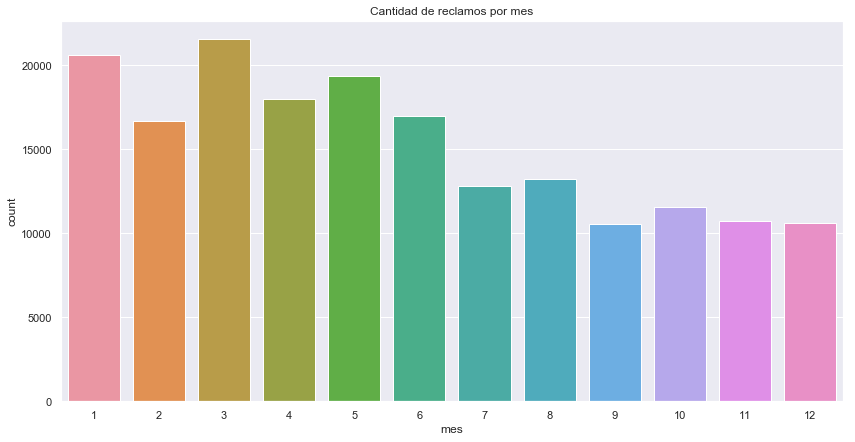

In [103]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(ax=ax, x="mes",  data=df_train)
plt.title("Cantidad de reclamos por mes")
plt.show()

In [35]:
df_train["year"] = df_train["fecha"].dt.year

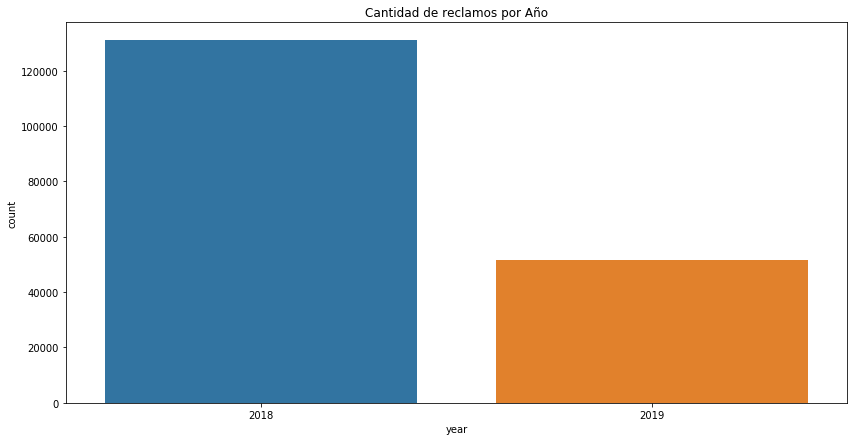

In [26]:
fig, ax = plt.subplots(figsize=(14,7))
sns.countplot(ax=ax, x="year",  data=df_train)
plt.title("Cantidad de reclamos por Año")
plt.show()

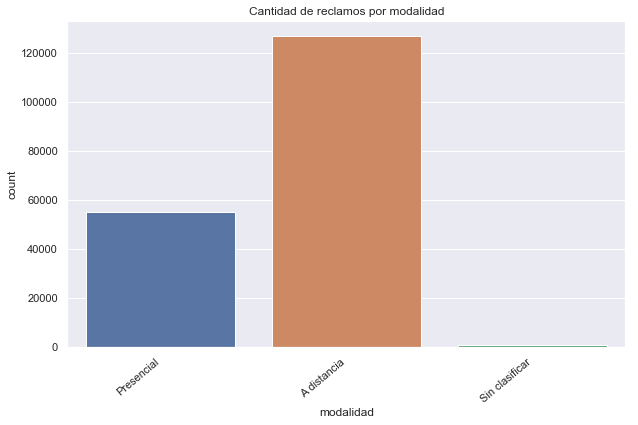

In [323]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="modalidad", data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de reclamos por modalidad")
plt.show()

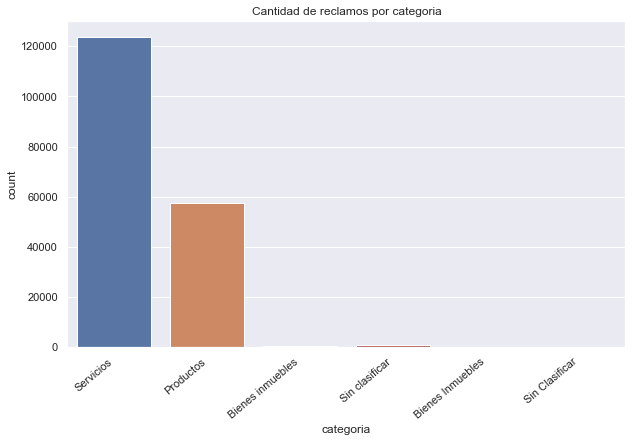

In [324]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="categoria", data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de reclamos por categoria")
plt.show()

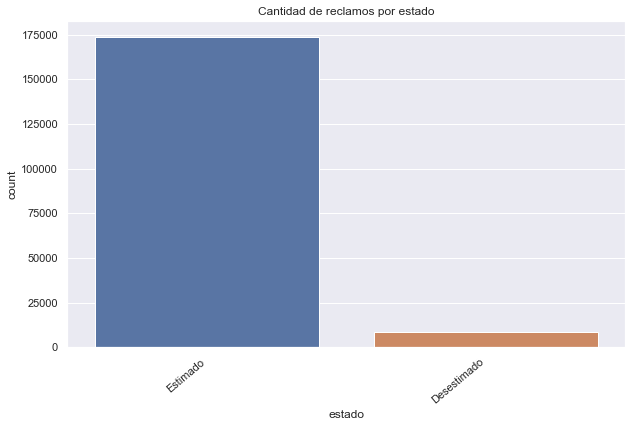

In [327]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="estado", data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de reclamos por estado")
plt.show()

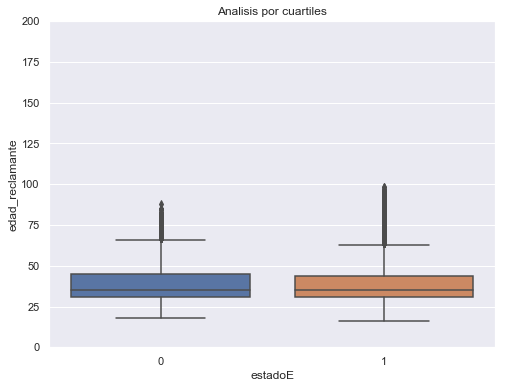

In [105]:
#box plot 
var = 'estadoE' 
data = pd.concat([df_train['edad_reclamante'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="edad_reclamante", data=data)
fig.axis(ymin=0, ymax=200);
plt.title("Analisis por cuartiles")
plt.show()

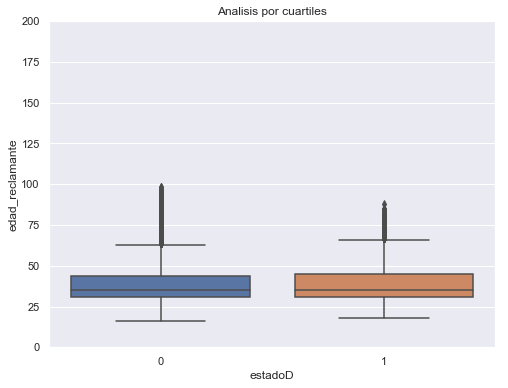

In [106]:
#box plot 
var = 'estadoD' 
data = pd.concat([df_train['edad_reclamante'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="edad_reclamante", data=data)
fig.axis(ymin=0, ymax=200);
plt.title("Analisis por cuartiles")
plt.show()

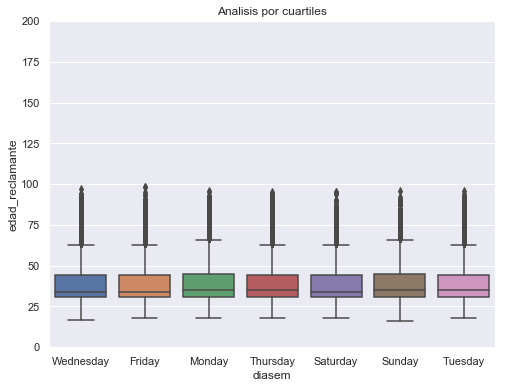

In [107]:
var = 'diasem'
data = pd.concat([df_train['edad_reclamante'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="edad_reclamante", data=data)
fig.axis(ymin=0, ymax=200);
plt.title("Analisis por cuartiles")
plt.show()

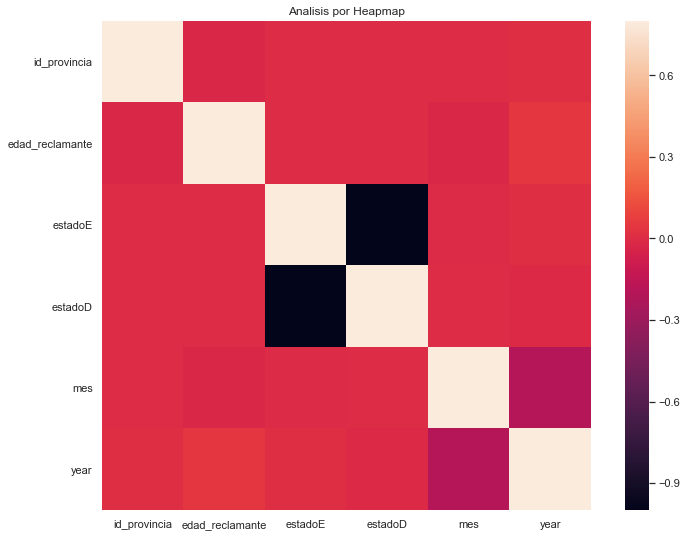

In [108]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title("Analisis por Heapmap")
plt.show()

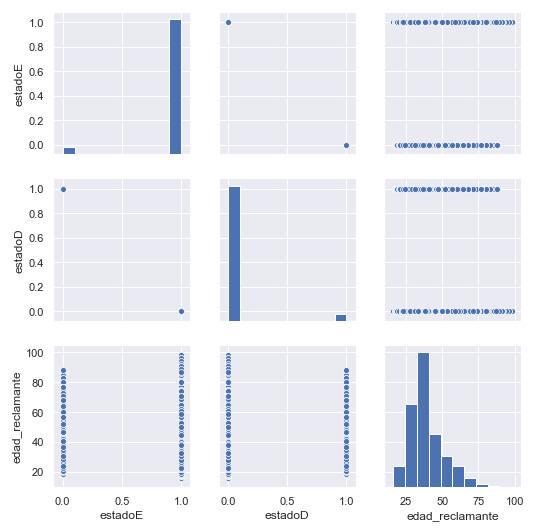

In [110]:
sns.set()
cols = ['estadoE', 'estadoD', 'edad_reclamante']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()


# ML Aprendizaje Supervisado

In [27]:
df_train.shape

(182676, 22)

In [36]:
train = df_train

In [37]:
train = train.drop("fecha", axis=1)

In [38]:
train = train.drop("id_provincia", axis=1)

In [39]:
train = train.drop("diasem", axis=1)

In [44]:
# Proceso de Separacion Training y Test Set.
y = train.iloc[:,15]

x = train.iloc[:,14:]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=3)

In [42]:
train.head(5)

,razon_social,ingreso_por,derivado_a,categoria,rubro,subrubro,modalidad,motivo,especificacion_motivo,estado,...,region_reclamante,provincia_reclamante,genero_reclamante,edad_reclamante,estadoE,estadoD,mes,Estimado,Desestimado,year
id_reclamo,,,,,,,,,,,,,,,,,,,,,
143587,Soluciones Empresariales Arg.,Jurisdicción Jujuy,Jujuy,Servicios,Servicios financieros y seguros,Compañías financieras (mutuos),Presencial,Incumplimiento total de la prestación del serv...,No especifica,Estimado,...,Noroeste,Jujuy,Sin clasificar,34.0,1,0,1,1,0,2018
143588,Despegar.com.ar SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios turísticos,Paquetes turísticos,Presencial,Cumplimiento parcial o defectuoso de la presta...,Cancelación o supresión de viaje,Estimado,...,Noroeste,Jujuy,Sin clasificar,34.0,1,0,1,1,0,2018
143589,Perez Roberto Jesus,Jurisdicción Jujuy,Jujuy,Productos,Construcción y equipamiento del hogar,Herramientas,Presencial,Entrega defectuosa,Producto no funciona,Estimado,...,Noroeste,Jujuy,Sin clasificar,34.0,1,0,1,1,0,2018
143590,Horacio Pussetto SA,Jurisdicción Jujuy,Jujuy,Productos,"Rodados, automotores y embarcaciones",Automóviles,Presencial,"Incumplimiento de oferta, promociones y/o boni...",No especifica,Estimado,...,Noroeste,Jujuy,Sin clasificar,34.0,1,0,1,1,0,2018
143591,Directv Argentina SA,Jurisdicción Jujuy,Jujuy,Servicios,Servicios de comunicaciones,Televisión por cable/satelital,Presencial,Falta de procesamiento de baja del servicio,No especifica,Estimado,...,Noroeste,Jujuy,Sin clasificar,34.0,1,0,1,1,0,2018


In [45]:
y

id_reclamo
143587    1
143588    1
143589    1
143590    1
143591    1
143592    1
143593    1
143594    1
143595    1
143596    1
143597    1
143598    1
143599    1
143600    1
143601    1
143602    1
143603    1
143604    1
143605    1
143606    1
143607    1
143608    1
143609    1
143610    1
143611    1
143612    1
143613    1
143614    1
143615    1
143616    1
         ..
326233    1
326234    1
326235    1
326236    1
326237    1
326238    1
326239    1
326240    1
326241    1
326242    1
326243    1
326244    1
326245    1
326246    1
326247    1
326248    1
326249    1
326250    1
326251    1
326252    1
326253    1
326254    1
326255    1
326256    1
326257    1
326258    0
326259    1
326260    1
326261    1
326262    1
Name: estadoE, Length: 182676, dtype: int64

In [46]:
x

,edad_reclamante,estadoE,estadoD,mes,Estimado,Desestimado,year
id_reclamo,,,,,,,
143587,34.0,1,0,1,1,0,2018
143588,34.0,1,0,1,1,0,2018
143589,34.0,1,0,1,1,0,2018
143590,34.0,1,0,1,1,0,2018
143591,34.0,1,0,1,1,0,2018
143592,34.0,1,0,1,1,0,2018
143593,34.0,1,0,1,1,0,2018
143594,34.0,1,0,1,1,0,2018
143595,34.0,1,0,1,1,0,2018


# KNN

In [47]:
#Entrenar modelo KNN
# defino modelo KNN llamado "prueba"
prueba = KNeighborsClassifier(n_neighbors=23)
# Ajusto mi modelo a las muestras de training utilizando tanto Xtrain como Ytrain
prueba.fit(xtrain, ytrain) 

# Genero predicciones con mi modelo entrenado para las muestras de Test, utilizando solo Xtest
ypred = prueba.predict(xtest)

In [48]:
# Computo el accuracy (comparar ytest vs ypred)
test_acc = accuracy_score(ytest, ypred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.9991241515217867


In [49]:
cm = confusion_matrix(ytest, ypred)
cm

array([[ 1792,    32],
       [    0, 34712]], dtype=int64)

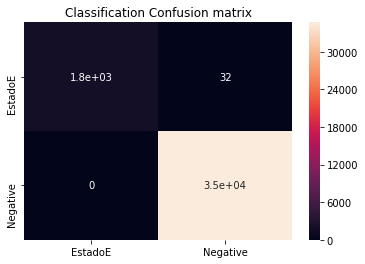

In [50]:
import matplotlib.pyplot as plt

confm = confusion_matrix(ytest, ypred)
confmat = pd.DataFrame(confm, index = ['EstadoE', 'Negative'], columns = ['EstadoE', 'Negative'])
plt.figure(figsize = (6,4))
sns.heatmap(confmat, annot=True)
plt.title('Classification Confusion matrix')
plt.show()

# StandardScale

In [51]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler().fit(xtrain)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
xtrain_scal = scaler.transform(xtrain)  
xtest_scal = scaler.transform(xtest) 

In [53]:
xtrain_scal.shape

(146140, 7)

# Feature Selection con RFE

In [54]:
# umbral para definir con que % de features nos quedamos
thresh = 0.2

In [55]:
xtrain_scal_red_var = xtrain.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), thresh)).values]
xtest_scal_red_var = xtest.iloc[:,(np.std(xtrain)>np.quantile(np.std(xtrain), thresh)).values]

In [56]:
print("La cantidad de Features seleccionadas son " + str(np.shape(xtrain_scal_red_var)[1]))

La cantidad de Features seleccionadas son 3


In [63]:
# creo un modelo clasificador de SVM para clasificar en cada iteracion del RFE y obtener un accuracy
costrfe = 20
svcrfe = svm.SVC(C=costrfe, kernel="linear")

In [67]:
# creo un modelo de RFE indicando que clasificador utilizar, el CV y que scoring quiero determinar para seleccionar las features
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=svcrfe, step=1, cv=2, scoring='accuracy')

In [68]:
rfecv.fit(xtrain_scal, ytrain)

RFECV(cv=2,
   estimator=SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [69]:
np.argmax(rfecv.grid_scores_)

0

Optimal number of features : 1


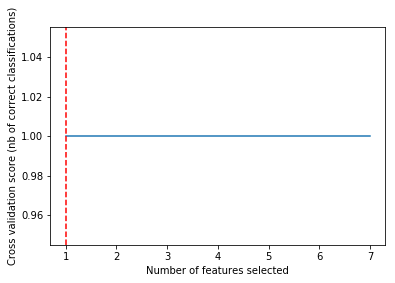

In [70]:
# Imprimo como varia el accuracy a medida que voy quitando features
print("Optimal number of features : %d" % rfecv.n_features_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.axvline(x=np.argmax(rfecv.grid_scores_)+1, c= 'r', linestyle = '--')
plt.show()